# Fifa Players Notebook

> In this Notebook, we are going to explore the Offical Fifa players dataset and learn the main functionalities of the Pandas, NumPy, and Matplotlib libraries.

## Pandas Library

The pandas library is a library used for Data Manipulation and Analysis.

A common practice in the Data Science and Machine Learning community to import the pandas library as `pd` for short.

In [1]:
# Import the library
import pandas as pd

The padnas library has two types of Data:

1. The `Series` - which represents a single row of the table, or simply a list of values, in many cases, it is swapable with python list.


2. The `DataFrame` - which represets an entire table.




| Series | DataFrame|
|:---: | :---:|
|**1 Dimensional** | **2 Dimensional**|
|Less Common to use | More common to use|
|Created using `pd.Series()` | Created using `pd.DataFrame()`
|Based On Numpy Arrays | Based on Numpy Array|
|In some cases, swapable with Python's list `[]` | Lists within Dictionary `{column_name : []}`


In [2]:
# Create a pandas DataFrame
game_shop = pd.DataFrame({"Product name": ["doll", "PS5", "PS4", "PS3", "PS2", "PS1", "PSP"],
                          "Product Price (BD)": [5, 250, 100, 35, 20, 20, 60],
                          "Available QNT": [20, 0, 10, 0, 0, 0, 0]})

In [3]:
# Let's view the DataFrame
game_shop

,Product name,Product Price (BD),Available QNT
0,doll,5,20
1,PS5,250,0
2,PS4,100,10
3,PS3,35,0
4,PS2,20,0
5,PS1,20,0
6,PSP,60,0


In [4]:
# Let's view all products we have
game_shop["Product name"]

0    doll
1     PS5
2     PS4
3     PS3
4     PS2
5     PS1
6     PSP
Name: Product name, dtype: object

In [5]:
# View the first row
game_shop.head()

,Product name,Product Price (BD),Available QNT
0,doll,5,20
1,PS5,250,0
2,PS4,100,10
3,PS3,35,0
4,PS2,20,0


The `head()` method returns the first five rows of the DataFrame

>If we have a dataset named `df` we can select any column by: `df["column name"]`

In [6]:
# Select a column
game_shop["Product name"]

0    doll
1     PS5
2     PS4
3     PS3
4     PS2
5     PS1
6     PSP
Name: Product name, dtype: object

> If we have a dataset named `df`, we can select the first row by:
`df.values[0]`

In [7]:
game_shop.values[0]

array(['doll', 5, 20], dtype=object)

To delete rows or columns

we can use the `drop` method, and specify whether it is a row or a column
if column, we need to pass `axis=1`

> **Note**, this will create a new copy DataFrame instead of updating the older one

In [8]:
# Delete a column
game_shop = game_shop.drop("Available QNT", axis=1)

# View the updated DataFrame
game_shop

,Product name,Product Price (BD)
0,doll,5
1,PS5,250
2,PS4,100
3,PS3,35
4,PS2,20
5,PS1,20
6,PSP,60


### Read a csv file

Using pandas, we can read csv files using

`pd.read_csv()`  and passing the url to to csv file

In [9]:
# Read the Fifa dataset from the internet and assign it to variable named df
df = pd.read_csv("https://raw.githubusercontent.com/Sayed-Husain/Introduction-to-Machine-Learning-Workshop/main/Data/Fifa%20Dataset.csv")

In [10]:
# Figure out the number of players in the DataFrame
len(df)

19239

In [11]:
# Show the first five rows of the DataFrame
df.head()

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,...,64,64,64,66,61,50,50,50,61,19
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,...,66,66,66,64,61,60,60,60,61,19
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,...,59,59,59,63,60,53,53,53,60,20
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,...,63,63,63,67,62,50,50,50,62,20
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,...,80,80,80,79,75,69,69,69,75,21


In [12]:
# Show the names of the columns of the DataFrame
df.columns.values

array(['short_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'release_clause_eur',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_str

In [13]:
# Show the number of columns in the DataFrame
len(df.columns.values)

93

As you can see, this is a huge dataset, and for expermentation, we probably dont need all of those columns.

Let's define our experiments

1. Find out who are the best players in the world (Messi vs CR7?)
2. Find the highest and lowest BMI (weight to height ratio) between players
3. Best player to invest/buy in (low wage for great value)

### Best Player in the world

For this experiment, we do not need the entire dataset, we only need the following columns:
1. `short_name` - The player name
2. `overall` - The player's overall score
3. `potential` - The players potential

Therefore, we will create a new DataFrame (`best_players`) only containing these columns

In [14]:
# Create the best_players DataFrame only containing the columns mentioned.
best_players = pd.DataFrame(df, columns=["short_name", "overall", "potential"])

In [15]:
# View the first 5 rows of the data
best_players.head()

,short_name,overall,potential
0,L. Messi,93,93
1,R. Lewandowski,92,92
2,Cristiano Ronaldo,91,91
3,Neymar Jr,91,91
4,K. De Bruyne,91,91


Though it seems that the DataFrame is already sorted, let's gurantee it by sorting it.

In [16]:
# Sort the DataFrame
best_players = best_players.sort_values("overall", ascending=False)

In [17]:
# View who are the best 10 players in the game
best_players.head(10)

,short_name,overall,potential
0,L. Messi,93,93
1,R. Lewandowski,92,92
2,Cristiano Ronaldo,91,91
3,Neymar Jr,91,91
4,K. De Bruyne,91,91
5,J. Oblak,91,93
6,K. Mbappé,91,95
7,M. Neuer,90,90
8,M. ter Stegen,90,92
9,H. Kane,90,90


Though we achieved our intended results and figured out who are the best players in the world, looking at a table is not fun. Threfore, lets take an extra step to visualize the data we gathered.

## Matplotlib

The matplotlib library is a library used for Data visualization and plotting.

A common practice in the Data Science and Machine Learning community to import the matplotlib.pyplot library as `plt` for short.

In [18]:
# Import the matplotlib library
import matplotlib.pyplot as plt

let's visualize the best player in a line graph, first we will need:
1. The `x` - representing the name of the player
2. The `y` - represting the overall score of the player

In [19]:
# Make the x and y for the best 10 players in the world
x = best_players["short_name"].head(10)
y = best_players["overall"].head(10)

Now, we can plot the data,

**Note**: For a better visualization, let's also state where at what values the y axis should start and end.

(88.0, 95.0)

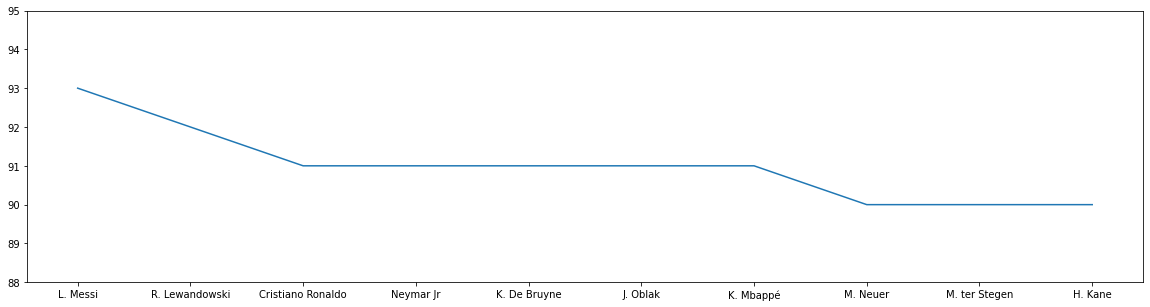

In [20]:
# Plot the data as line graph
plt.figure(figsize=(20,5)) # Set the size of the plot
plt.plot(x, y) # Plot the data
plt.ylim(88, 95) # Set the start and finish of the y axis

Text(0.5, 1.0, 'The Best 10 Players in the world')

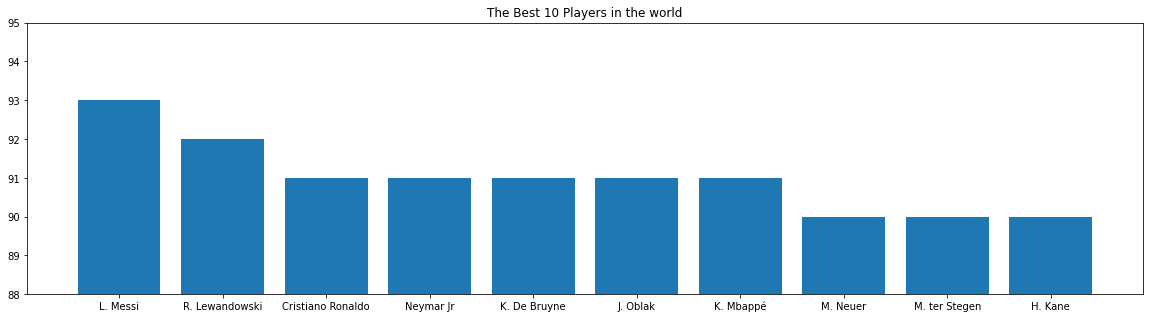

In [21]:
# Plot the data as bar graph
plt.figure(figsize=(20,5)) # Set the size of the plot
plt.bar(x, y) # Plot the data
plt.ylim(88, 95) # Set the start and finish of the y axis
plt.title("The Best 10 Players in the world")

## Highest and lowest BMI

For this experiment, the columns we need to get are:
`short_name` and the `BMI`. 

However, the original dataset does not have a `BMI` coulmn, therefore, we are going to make our own using the `height_cm` and the `weight_kg` columns.

BMI = weight(kg)/height(m)^2

Therefore, we will make a new DataFrame `players_BMI` containing the following columns from the original dataset:
1. `short_name`
2. `height_cm`
3. `weight_kg`

In [22]:
# Create the players_BMI DataFrame containing the columns mentioned 
players_BMI = pd.DataFrame(df, columns=["short_name", "height_cm", "weight_kg"])

# View the new DataFrame
players_BMI.head()

,short_name,height_cm,weight_kg
0,L. Messi,170,72
1,R. Lewandowski,185,81
2,Cristiano Ronaldo,187,83
3,Neymar Jr,175,68
4,K. De Bruyne,181,70


## Numpy

If we select a column name that is already there in the DataFrame, a new column will be craeted with the set values.

We will create a `BMI` column by deviding the `weight_kg` by the square of `height_cm`/100

in order to make these mathematical operations, we will need the help of the Numpy library. 

A common practice in the Data Science and Machine Learning community to import the numpy library as `np` for short.

In [23]:
# Import the numpy library
import numpy as np

In [24]:
# Create a BMI column
players_BMI["BMI"] = players_BMI["weight_kg"] / np.square(players_BMI["height_cm"] / 100)

# View the head of the DataFrame
players_BMI.head()

,short_name,height_cm,weight_kg,BMI
0,L. Messi,170,72,24.913495
1,R. Lewandowski,185,81,23.666910
2,Cristiano Ronaldo,187,83,23.735308
3,Neymar Jr,175,68,22.204082
4,K. De Bruyne,181,70,21.366869


Looking great so far.

Now let's do two things:
1. Find out who has the highest and lowest BMI in the game
2. Get the highest BMI, the Lowest BMI, and the median BMI and plot them.

**Find who has the Highest and Lowest BMI in the game**

In [25]:
# Find the who has the highest and lowest BMI by sorting the DataFrame
players_BMI.sort_values("BMI", ascending=False)

,short_name,height_cm,weight_kg,BMI
9816,A. Akinfenwa,178,110,34.717839
2816,R. Ábila,176,93,30.023244
5113,S. Mosquera,168,84,29.761905
4931,G. Mhango,162,76,28.959000
11107,C. Seitz,193,107,28.725603
...,...,...,...,...
18548,J. Keeley,191,65,17.817494
19218,C. Mutawe,184,60,17.722117
9802,P. Ndiaye,203,71,17.229246
13156,E. Emegha,195,63,16.568047


**Plot the highest, lowest, and median BMIs**

We can do this with the help of numpy library

In [26]:
# Find the max, min, and median values
max_BMI = np.max(players_BMI["BMI"])
median_BMI = np.median(players_BMI["BMI"])
min_BMI = np.min(players_BMI["BMI"])

Text(0.5, 1.0, 'BMI in the Football Game')

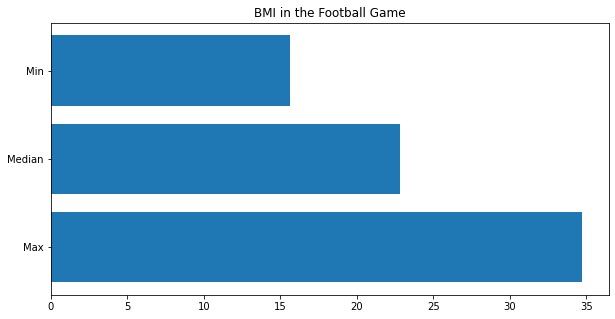

In [27]:
# Plot the data
plt.figure(figsize=(10,5))
plt.barh(["Max", "Median", "Min"], [max_BMI, median_BMI, min_BMI])
plt.title("BMI in the Football Game")

### Best player to invest/buy 

We can find out which players are best to buy by subtracting the wage of the player from the value. The higher the number is, the better investment it is.

Therefore, we only need the following columns:
1. `short_name` - The player name 
2. `wage_eur` - The player's current wage
3. `value_eur` - The player's actual value

Therefore, we will create a new DataFrame (`players_investment`) only containing these columns

In [28]:
# Create the players_investment DataFrame
players_investment = pd.DataFrame(df, columns=["short_name", "wage_eur", "value_eur"])

# View the head of the DataFrame
players_investment.head()

,short_name,wage_eur,value_eur
0,L. Messi,320000.0,78000000.0
1,R. Lewandowski,270000.0,119500000.0
2,Cristiano Ronaldo,270000.0,45000000.0
3,Neymar Jr,270000.0,129000000.0
4,K. De Bruyne,350000.0,125500000.0


In [29]:
# Add Bahraini currency to the DataFrame
players_investment["wage_bd"] = players_investment["wage_eur"] * 0.38
players_investment["value_bd"] = players_investment["value_eur"] * 0.38

# View the head of the DataFrame
players_investment.head()

,short_name,wage_eur,value_eur,wage_bd,value_bd
0,L. Messi,320000.0,78000000.0,121600.0,29640000.0
1,R. Lewandowski,270000.0,119500000.0,102600.0,45410000.0
2,Cristiano Ronaldo,270000.0,45000000.0,102600.0,17100000.0
3,Neymar Jr,270000.0,129000000.0,102600.0,49020000.0
4,K. De Bruyne,350000.0,125500000.0,133000.0,47690000.0


In [30]:
# Let's drop eur currency
players_investment = players_investment.drop("wage_eur", axis=1)
players_investment = players_investment.drop("value_eur", axis=1)

# View the head of the DataFrame
players_investment.head()

,short_name,wage_bd,value_bd
0,L. Messi,121600.0,29640000.0
1,R. Lewandowski,102600.0,45410000.0
2,Cristiano Ronaldo,102600.0,17100000.0
3,Neymar Jr,102600.0,49020000.0
4,K. De Bruyne,133000.0,47690000.0


In [31]:
# Create the differece column
players_investment["difference_bd"] = players_investment["value_bd"] - players_investment["wage_bd"]  

# View the head
players_investment.head()

,short_name,wage_bd,value_bd,difference_bd
0,L. Messi,121600.0,29640000.0,29518400.0
1,R. Lewandowski,102600.0,45410000.0,45307400.0
2,Cristiano Ronaldo,102600.0,17100000.0,16997400.0
3,Neymar Jr,102600.0,49020000.0,48917400.0
4,K. De Bruyne,133000.0,47690000.0,47557000.0


In [32]:
# Sort the DataFrame
players_investment = players_investment.sort_values("difference_bd", ascending=False)

# View the head
players_investment.head()

,short_name,wage_bd,value_bd,difference_bd
6,K. Mbappé,87400.0,73720000.0,73632600.0
29,E. Haaland,41800.0,52250000.0,52208200.0
9,H. Kane,91200.0,49210000.0,49118800.0
3,Neymar Jr,102600.0,49020000.0,48917400.0
4,K. De Bruyne,133000.0,47690000.0,47557000.0


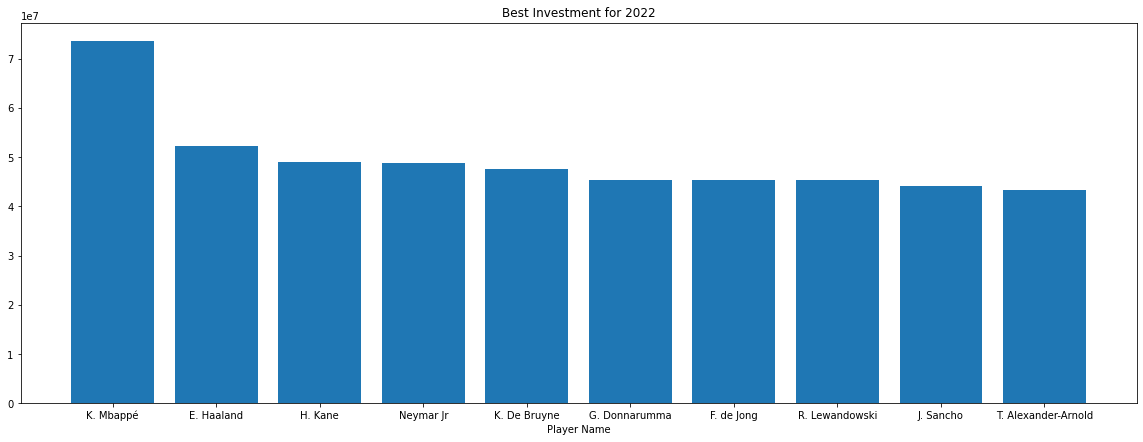

In [33]:
# Visulaize the best 10 players to invest in
X = players_investment.head(10)["short_name"]
Y = players_investment.head(10)["difference_bd"]

plt.figure(figsize=(20,7))
plt.bar(X, Y)
plt.title("Best Investment for 2022")
plt.xlabel("Player Name");


> **Bonus**: Check whether Harry magiure is a good investment or not

<img src="https://upload.wikimedia.org/wikipedia/commons/3/39/Harry_Maguire_2021.jpg" width=200>

In [34]:
# Reset the index
players_investment = players_investment.reset_index()

In [35]:
players_investment.head()

,index,short_name,wage_bd,value_bd,difference_bd
0,6,K. Mbappé,87400.0,73720000.0,73632600.0
1,29,E. Haaland,41800.0,52250000.0,52208200.0
2,9,H. Kane,91200.0,49210000.0,49118800.0
3,3,Neymar Jr,102600.0,49020000.0,48917400.0
4,4,K. De Bruyne,133000.0,47690000.0,47557000.0


In [36]:
# Delete the index column
players_investment = players_investment.drop("index", axis=1)

In [37]:
# Check if Harry Maguire is a good deal or not
players_investment[players_investment["short_name"] == "H. Maguire"]

,short_name,wage_bd,value_bd,difference_bd
145,H. Maguire,58900.0,16150000.0,16091100.0


**Harry Maguire ranks 145**